In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd 
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [15]:
df = pd.read_csv("/kaggle/input/bart-ridership/ridership/date-hour-soo-dest-2023.csv")


In [16]:
df.head()

,Date,Hour,Origin Station,Destination Station,Trip Count
0,2023-01-01,0,12TH,12TH,1
1,2023-01-01,0,12TH,16TH,1
2,2023-01-01,0,12TH,19TH,2
3,2023-01-01,0,12TH,24TH,3
4,2023-01-01,0,12TH,ASHB,2


In [17]:
df["Date"]=pd.to_datetime(df["Date"])


In [18]:
df["day"]=df["Date"].dt.dayofweek
df["month"]=df["Date"].dt.month
df["year"]=df["Date"].dt.year

df["weekday"]=df["Date"].dt.day_name()
df["month_name"]=df["Date"].dt.month_name()



In [19]:
df=df.drop("Date",axis=1)
df.head()

,Hour,Origin Station,Destination Station,Trip Count,day,month,year,weekday,month_name
0,0,12TH,12TH,1,6,1,2023,Sunday,January
1,0,12TH,16TH,1,6,1,2023,Sunday,January
2,0,12TH,19TH,2,6,1,2023,Sunday,January
3,0,12TH,24TH,3,6,1,2023,Sunday,January
4,0,12TH,ASHB,2,6,1,2023,Sunday,January


# eda

In [33]:
df.sample(10)

,Hour,Origin Station,Destination Station,Trip Count,day,month,year,weekday,month_name,weekday_num
577524,14,DALY,DUBL,3,4,1,2023,Friday,January,5
2340190,9,FTVL,24TH,10,3,4,2023,Thursday,April,4
1434094,18,COLM,BAYF,1,6,3,2023,Sunday,March,7
318007,14,ANTC,SANL,1,0,1,2023,Monday,January,1
1125413,11,DALY,SSAN,3,0,2,2023,Monday,February,1
495817,8,ORIN,MLPT,1,1,1,2023,Tuesday,January,2
2788696,21,LAKE,24TH,3,0,5,2023,Monday,May,1
2720802,19,SFIA,POWL,61,4,4,2023,Friday,April,5
952729,19,SBRN,DALY,2,6,2,2023,Sunday,February,7
1978939,2,GLEN,SHAY,1,2,3,2023,Wednesday,March,3


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2815982 entries, 0 to 2815981
Data columns (total 10 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   Hour                 int64 
 1   Origin Station       object
 2   Destination Station  object
 3   Trip Count           int64 
 4   day                  int64 
 5   month                int64 
 6   year                 int64 
 7   weekday              object
 8   month_name           object
 9   weekday_num          int64 
dtypes: int64(6), object(4)
memory usage: 214.8+ MB


In [36]:
df.describe()

,Hour,Trip Count,day,month,year,weekday_num
count,2.815982e+06,2.815982e+06,2.815982e+06,2.815982e+06,2815982.0,2.815982e+06
mean,1.364453e+01,5.487115e+00,2.798922e+00,2.577473e+00,2023.0,3.798922e+00
std,5.283518e+00,1.077862e+01,1.933385e+00,1.156774e+00,0.0,1.933385e+00
min,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,2023.0,1.000000e+00
25%,9.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2023.0,2.000000e+00
50%,1.400000e+01,2.000000e+00,3.000000e+00,3.000000e+00,2023.0,4.000000e+00
75%,1.800000e+01,5.000000e+00,4.000000e+00,4.000000e+00,2023.0,5.000000e+00
max,2.300000e+01,3.200000e+02,6.000000e+00,5.000000e+00,2023.0,7.000000e+00


In [37]:
df.corr()

,Hour,Trip Count,day,month,year,weekday_num
Hour,1.000000,-0.020069,0.050727,0.001898,NaN,0.050727
Trip Count,-0.020069,1.000000,-0.067236,0.021767,NaN,-0.067236
day,0.050727,-0.067236,1.000000,-0.011145,NaN,1.000000
month,0.001898,0.021767,-0.011145,1.000000,NaN,-0.011145
year,NaN,NaN,NaN,NaN,NaN,NaN
weekday_num,0.050727,-0.067236,1.000000,-0.011145,NaN,1.000000


In [38]:
df["Trip Count"].value_counts().describe()

count    2.750000e+02
mean     1.023993e+04
std      7.220327e+04
min      1.000000e+00
25%      9.000000e+00
50%      4.900000e+01
75%      5.275000e+02
max      1.012449e+06
Name: Trip Count, dtype: float64

In [39]:
df.isnull().sum()

Hour                   0
Origin Station         0
Destination Station    0
Trip Count             0
day                    0
month                  0
year                   0
weekday                0
month_name             0
weekday_num            0
dtype: int64

In [40]:
df["Origin Station"].unique()

array(['12TH', '16TH', '19TH', '24TH', 'ANTC', 'ASHB', 'BALB', 'BAYF',
       'BERY', 'CAST', 'CIVC', 'COLM', 'COLS', 'CONC', 'DALY', 'DBRK',
       'DELN', 'DUBL', 'EMBR', 'FRMT', 'FTVL', 'GLEN', 'HAYW', 'LAFY',
       'LAKE', 'MCAR', 'MLBR', 'MLPT', 'MONT', 'NBRK', 'NCON', 'OAKL',
       'PCTR', 'PHIL', 'PITT', 'PLZA', 'POWL', 'RICH', 'ROCK', 'SANL',
       'SBRN', 'SFIA', 'SHAY', 'SSAN', 'UCTY', 'WARM', 'WCRK', 'WOAK',
       'ORIN', 'WDUB'], dtype=object)

In [48]:
df["month"].unique()

array([1, 2, 3, 4, 5])

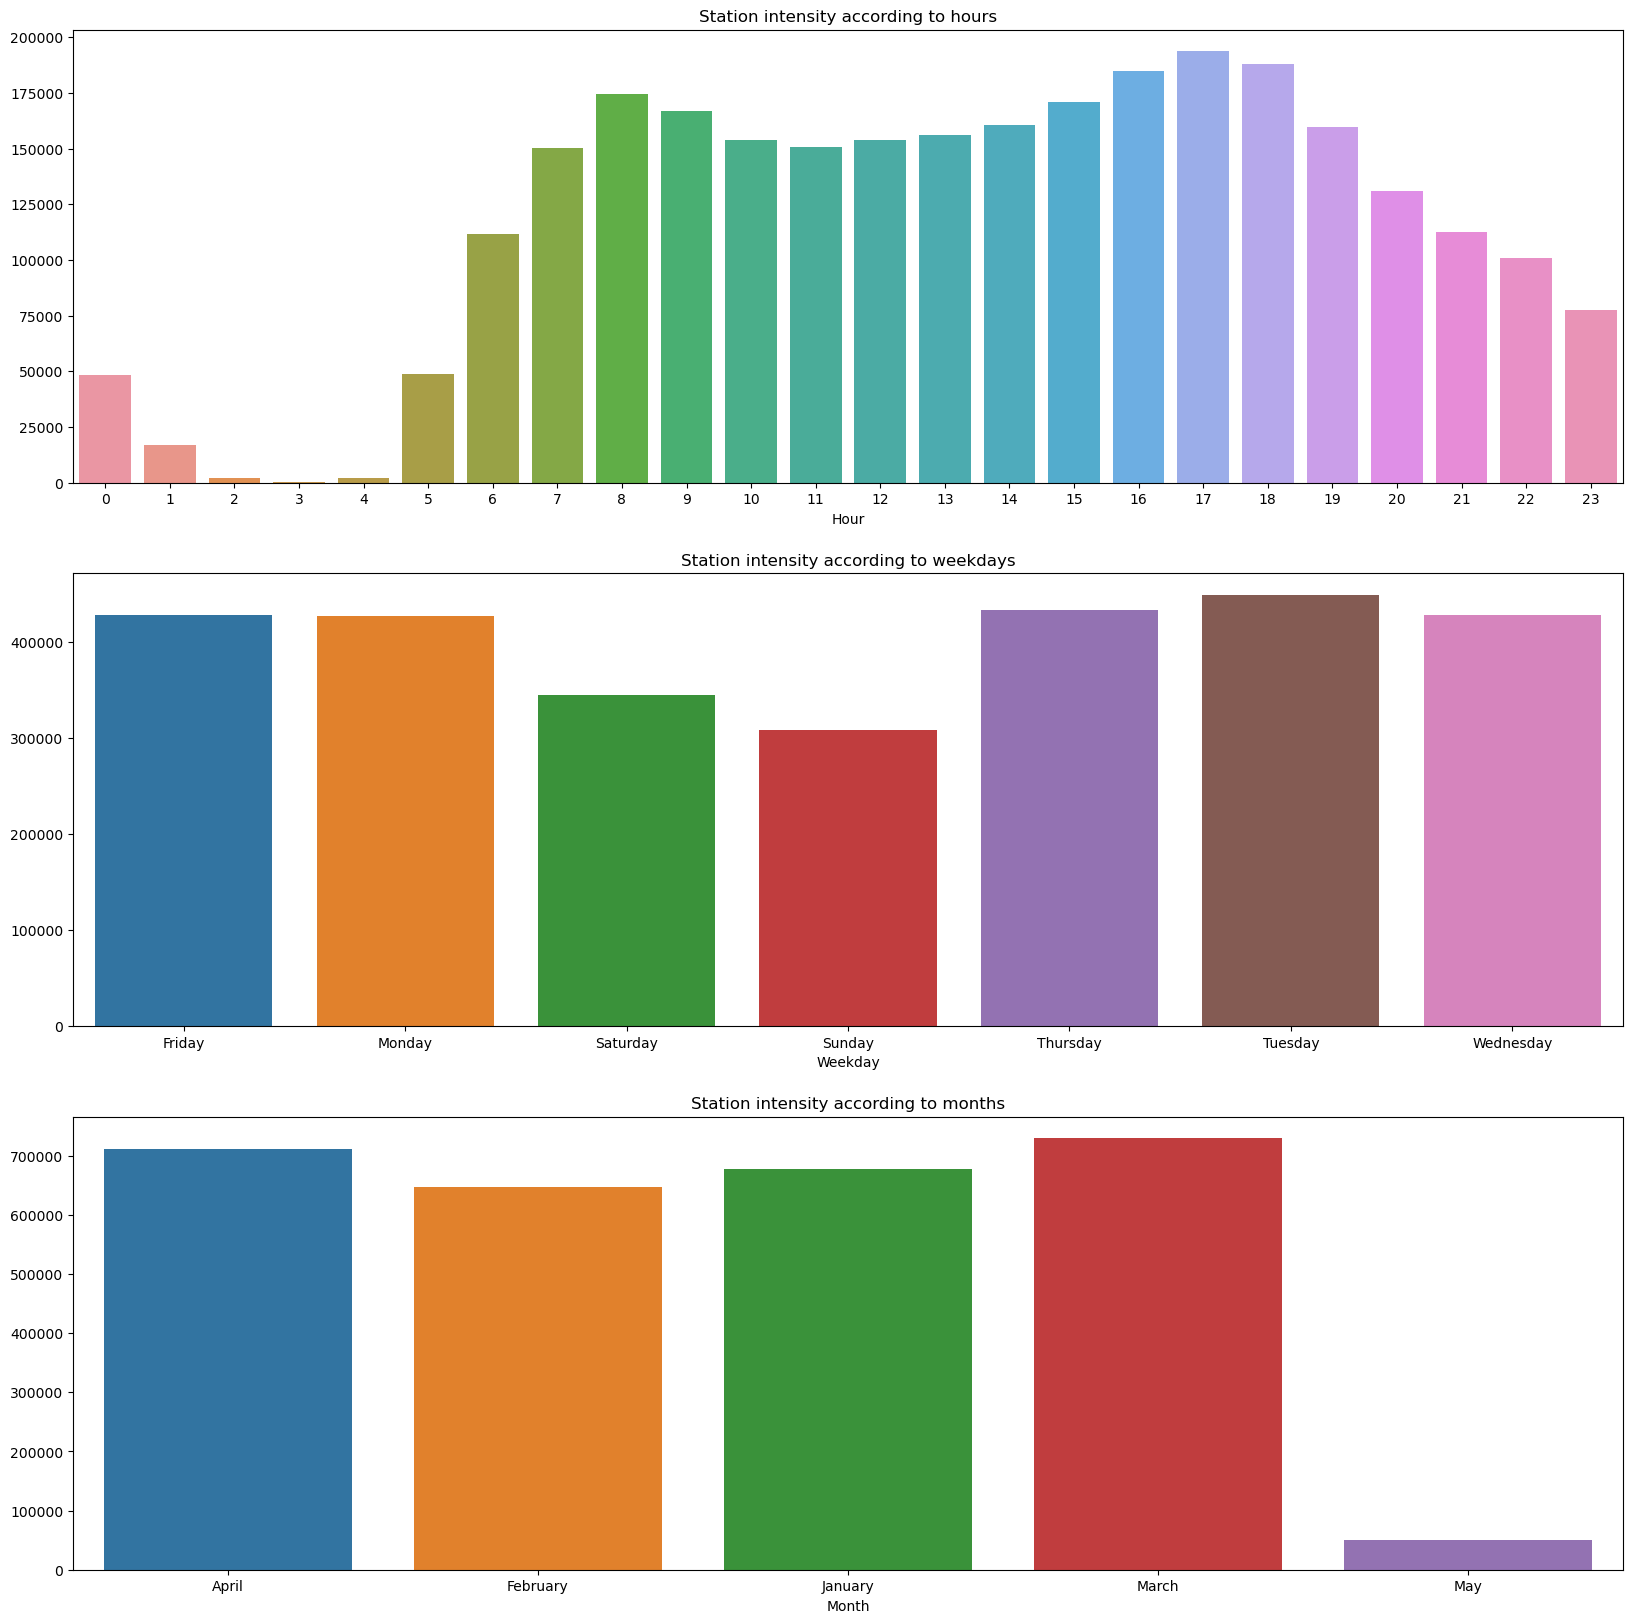

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

weekday_counts = df["weekday"].value_counts().sort_index()
month_counts = df["month_name"].value_counts().sort_index()
hour_counts = df["Hour"].value_counts().sort_index()

fig = plt.figure(figsize=(20, 20))

ax = fig.add_subplot(3, 1, 1)
ax = sns.barplot(x=hour_counts.index.tolist(), y=hour_counts.values)
ax.set_title("Station intensity according to hours")
ax.set_xlabel("Hour")

ax = fig.add_subplot(3, 1, 2)
ax = sns.barplot(x=weekday_counts.index, y=weekday_counts.values)
ax.set_title("Station intensity according to weekdays")
ax.set_xlabel("Weekday")

ax = fig.add_subplot(3, 1, 3)
ax = sns.barplot(x=month_counts.index, y=month_counts.values)
ax.set_title("Station intensity according to months")
ax.set_xlabel("Month")

plt.show()


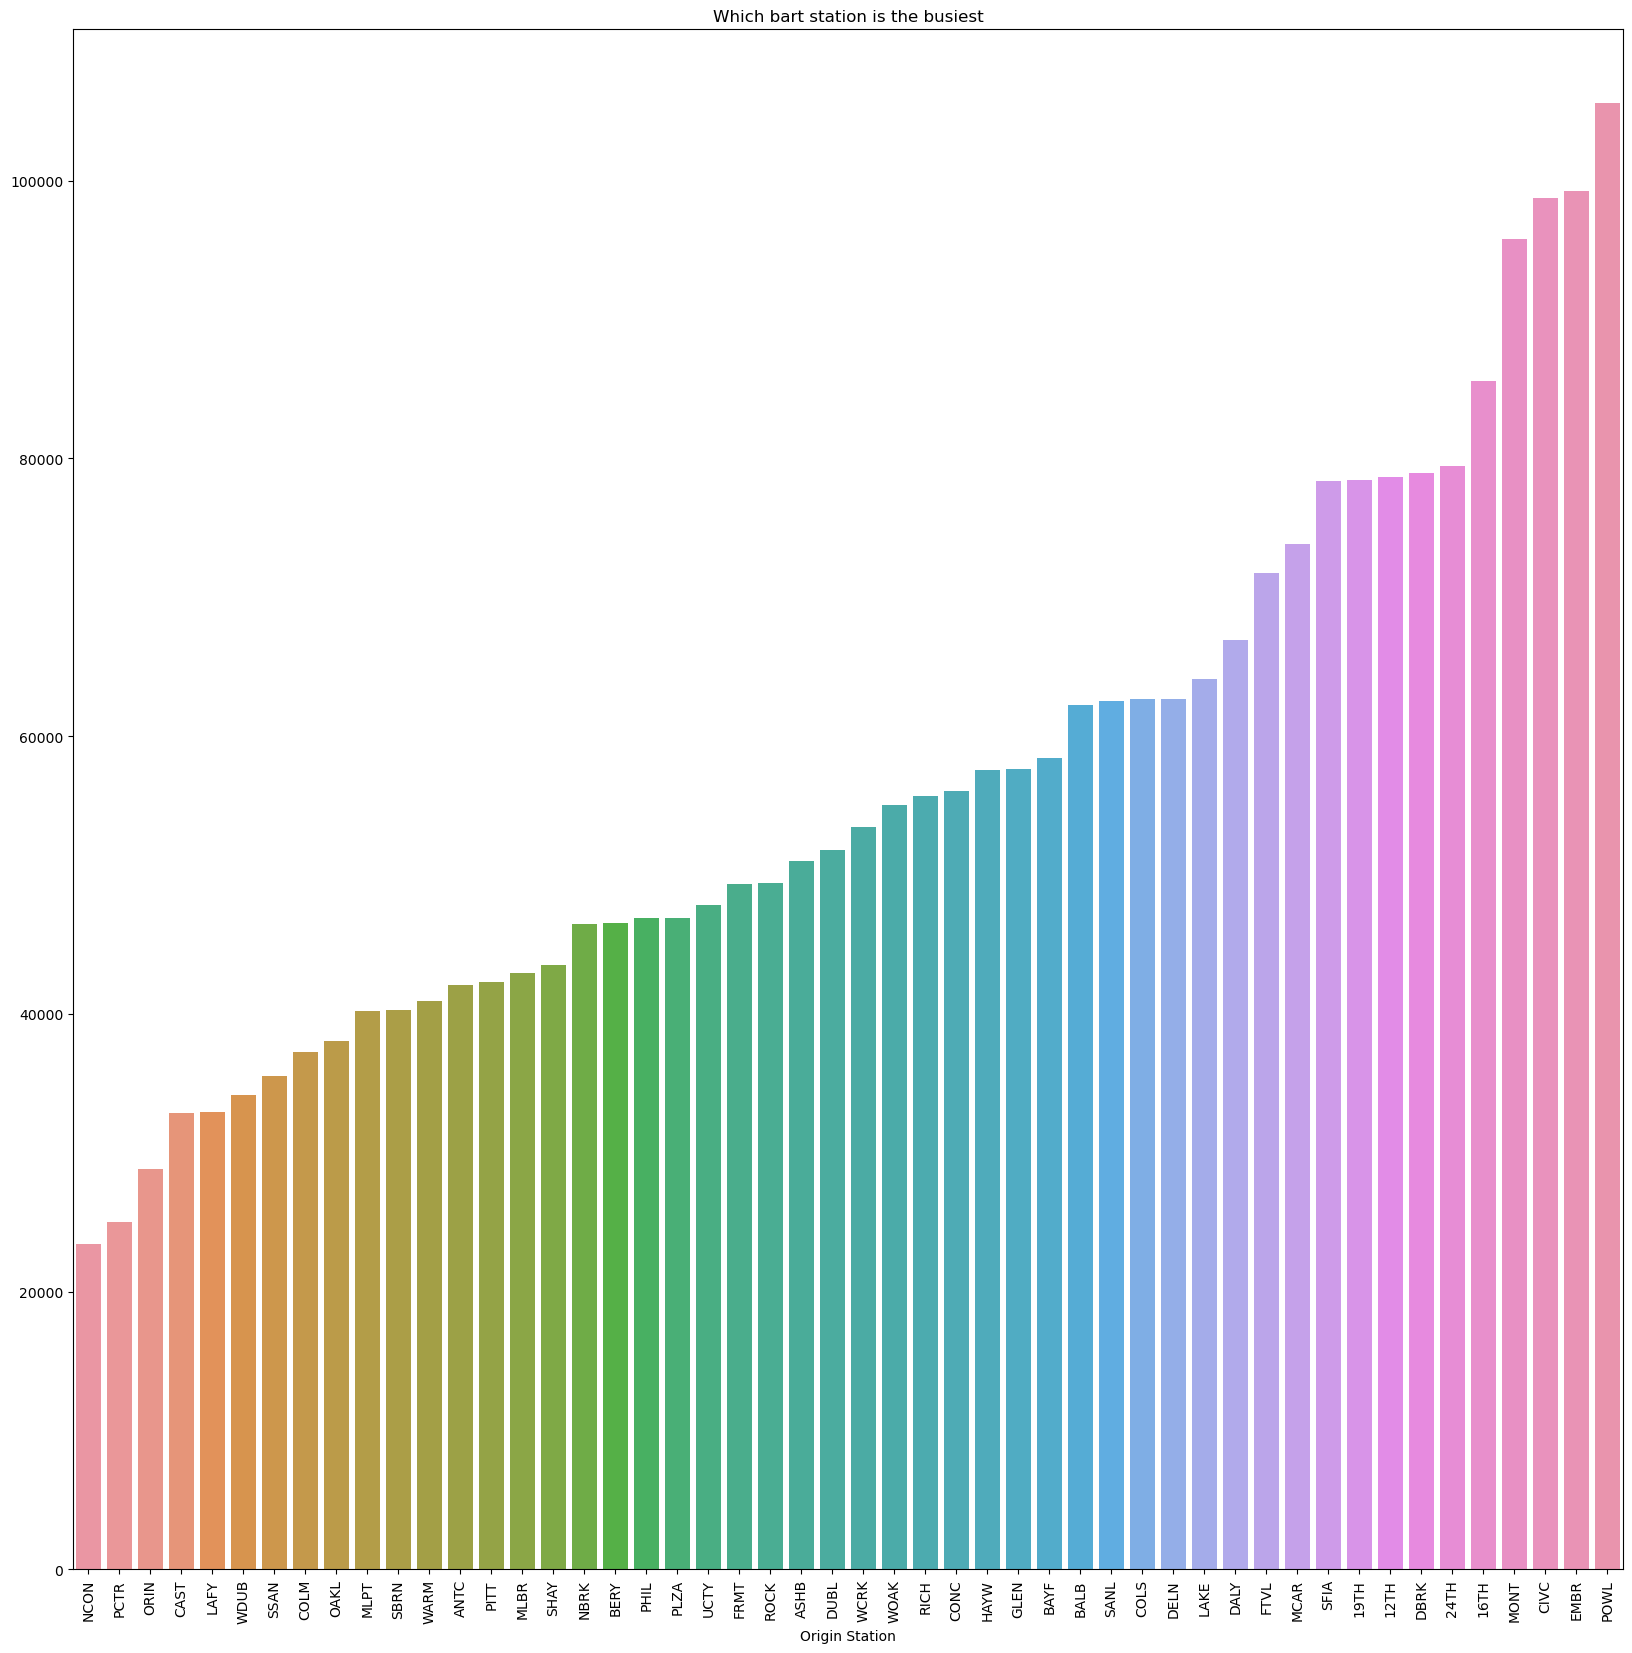

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

origin_counts = df["Origin Station"].value_counts().sort_values(ascending=True)

fig = plt.figure(figsize=(20, 20))

ax = fig.add_subplot(1, 1, 1)
ax = sns.barplot(x=origin_counts.index, y=origin_counts.values)
ax.set_title("Which bart station is the busiest")
ax.set_xlabel("Origin Station")
ax.set_xticklabels(origin_counts.index, rotation=90)

plt.show()


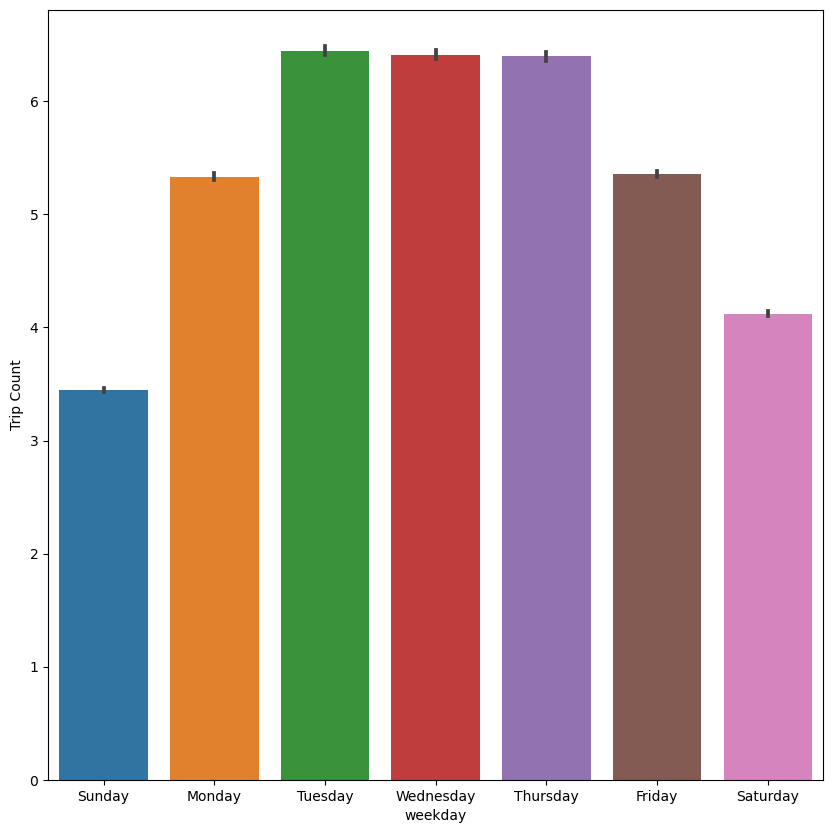

In [58]:
plt.figure(figsize=(10, 10))
sns.barplot(x=df["weekday"], y=df["Trip Count"])
plt.show()


In [62]:
X=df[["day"]]
Y=df[["Trip Count"]]



In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression


In [63]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.1, random_state=0)


In [64]:
print("Total size: ", df.shape[0])
print("Train size: ", train_X.shape, train_Y.shape)
print("Test size: ", test_X.shape, test_Y.shape)


Total size:  2815982
Train size:  (2534383, 1) (2534383, 1)
Test size:  (281599, 1) (281599, 1)


In [65]:
lr_model = LinearRegression()

lr_model.fit(train_X, train_Y)

LinearRegression()

In [66]:
lr_model_predicted = lr_model.predict(test_X)
lr_model_predicted

array([[5.7841305 ],
       [5.41050477],
       [4.28962757],
       ...,
       [6.15775623],
       [6.53138196],
       [4.66325331]])

In [67]:
lr_model_score = lr_model.score(test_X, test_Y )

lr_model_score

0.0047321143350439465